In [213]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [214]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

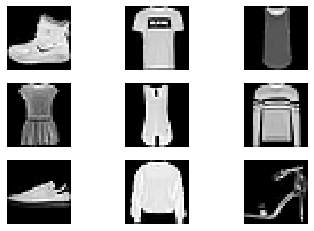

In [215]:
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show()

In [216]:
X_valid = X_train_full[:5000] / 255.0 #first 5000 is for validation
X_train = X_train_full[5000:] / 255.0 #5000-55000 is for training
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [217]:
from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0000001))

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    my_dense_layer(350),
    tf.keras.layers.Dropout(0.1),
    my_dense_layer(80),
    tf.keras.layers.Dropout(0.2),
    my_dense_layer(10, activation="softmax")
])

In [218]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
             metrics=["accuracy"])

In [219]:
history = model.fit(X_train, y_train, epochs=13, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/12
55000/55000 [==============================] - 25s 449us/sample - loss: 0.5900 - accuracy: 0.8119 - val_loss: 0.4582 - val_accuracy: 0.8512
Epoch 2/12
55000/55000 [==============================] - 28s 512us/sample - loss: 0.4758 - accuracy: 0.8505 - val_loss: 0.4396 - val_accuracy: 0.8638
Epoch 3/12
55000/55000 [==============================] - 31s 570us/sample - loss: 0.4344 - accuracy: 0.8627 - val_loss: 0.4151 - val_accuracy: 0.8708
Epoch 4/12
55000/55000 [==============================] - 34s 613us/sample - loss: 0.4104 - accuracy: 0.8730 - val_loss: 0.4042 - val_accuracy: 0.8770
Epoch 5/12
55000/55000 [==============================] - 34s 612us/sample - loss: 0.3911 - accuracy: 0.8786 - val_loss: 0.3745 - val_accuracy: 0.8852
Epoch 6/12
55000/55000 [==============================] - 31s 564us/sample - loss: 0.3786 - accuracy: 0.8835 - val_loss: 0.3801 - val_accuracy: 0.8884
Epoch 7/12
55000/55000 [=====================

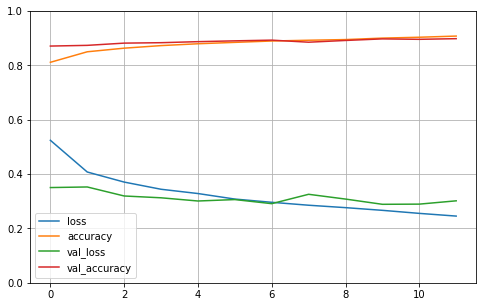

In [209]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [210]:
y_pred = model.predict_classes(X_train)
conf_train = confusion_matrix(y_train, y_pred)
print(conf_train)

[[4979    5   59  107    8    1  379    2    3    0]
 [   1 5399    0   41    2    0    1    0    0    0]
 [  49    2 4810   29  349    0  255    0    2    0]
 [  40    8    9 5313   96    1   32    0    0    0]
 [   5    4  246  168 4923    0  163    0    3    0]
 [   0    0    0    0    0 5377    0  125    2    3]
 [ 487    6  256  101  235    0 4415    0    7    0]
 [   0    0    0    0    0    6    0 5459    1   22]
 [   5    1    4   11   11    2   33    3 5440    0]
 [   0    0    0    0    0   15    0  279    0 5200]]


In [211]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3337102175235748, 0.8885]

In [212]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[849   2  18  25   2   3  94   3   4   0]
 [  4 977   0  15   2   0   1   0   1   0]
 [ 15   2 796  13  97   0  75   1   1   0]
 [ 20   4  11 917  25   0  19   1   3   0]
 [  0   1  77  41 838   0  42   0   1   0]
 [  0   0   0   0   0 942   0  47   0  11]
 [119   1  79  33  70   0 690   0   8   0]
 [  0   0   0   0   0  10   0 983   0   7]
 [  3   0   4   5   6   4   7   6 965   0]
 [  0   0   0   0   0   9   1  62   0 928]]
